# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Máquinas de Soporte vectorial</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>

In [6]:
import sklearn.datasets as skd
import sklearn.pipeline as skp
from sklearn.preprocessing import StandardScaler
import sklearn.svm as sksvm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go

flower = skd.load_iris(as_frame = True)

flower.frame

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

60.42687062799006
60.42687062799006
Intercept : [-1.00769927]
Coefficient : [[ 0.00716324 -0.01471871]]


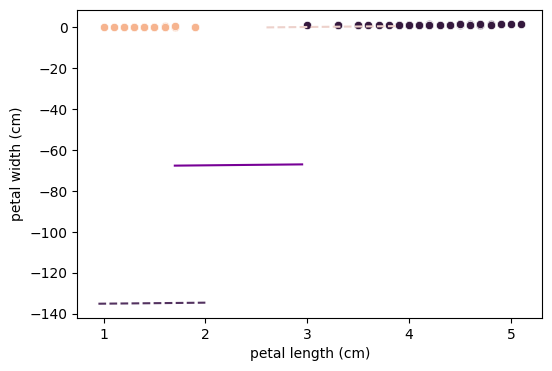

In [7]:
svm_pipeline = skp.make_pipeline(StandardScaler(),sksvm.LinearSVC(C=1,random_state = 42))

svm_model = sksvm.SVC(kernel = 'linear')
svm_model.fit(flower.data[['petal length (cm)','petal width (cm)']].values , flower.target == 1)

x = np.array([1.7,2.95])
m = - svm_model.coef_[0][0] /svm_model.coef_[0][1]
b = - svm_model.intercept_[0] / svm_model.coef_[0][1]
y =   m * x + b

dist = ((svm_model.coef_[0][0]*flower.data['petal length (cm)'] + svm_model.coef_[0][1]*flower.data['petal width (cm)'] + svm_model.intercept_[0])/(math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2 ))).abs()
shrt = float(dist.sort_values().iloc[2])
shrt2 = float(dist.sort_values().iloc[2])

print(shrt)
print(shrt2)

b1 = b + shrt2 * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]
b2 = b - shrt * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]

x2 = np.array([0.95,2])
x3= np.array([2.6,3.9])

y1 =   m * x2 + b1
y2 =   m * x3 + b2

print(f"Intercept : {svm_model.intercept_}")
print(f"Coefficient : {svm_model.coef_}")

plt.figure(figsize = (6,4))
sns.set_palette("rocket")
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 1])
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 0],color=sns.color_palette("rocket")[5])
plt.plot(x,y,color = '#770096')
plt.plot(x2,y1,color = '#533260',linestyle = 'dashed')
plt.plot(x3,y2,color = '#edd1cb',linestyle = 'dashed')
plt.show()

0.03140412232846999
0.03816718747667931
Intercept : [-14.41486828]
Coefficient : [[2.1829247  2.25365588]]


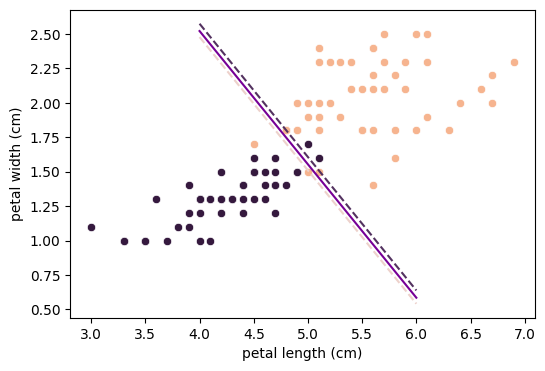

In [8]:

svm_pipeline = skp.make_pipeline(StandardScaler(),sksvm.LinearSVC(C=1,random_state = 42))

svm_model = sksvm.SVC(kernel = 'linear')
svm_model.fit(flower.data[['petal length (cm)','petal width (cm)']].values , flower.target == 2)

x = np.array([4,6])
m = - svm_model.coef_[0][0] /svm_model.coef_[0][1]
b = - svm_model.intercept_[0] / svm_model.coef_[0][1]
y =   m * x + b

dist = ((svm_model.coef_[0][0]*flower.data['petal length (cm)'] + svm_model.coef_[0][1]*flower.data['petal width (cm)'] + svm_model.intercept_[0])/(math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2 ))).abs()
shrt = float(dist.sort_values().iloc[0])
shrt2 = float(dist.sort_values().iloc[1])

print(shrt)
print(shrt2)

b1 = b + shrt2 * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]
b2 = b - shrt * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]

x2 = np.array([4,6])
x3= np.array([4,6])

y1 =   m * x2 + b1
y2 =   m * x3 + b2

print(f"Intercept : {svm_model.intercept_}")
print(f"Coefficient : {svm_model.coef_}")

plt.figure(figsize = (6,4))
sns.set_palette("rocket")
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 1])
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 2],color=sns.color_palette("rocket")[5])
plt.plot(x,y,color = '#770096')
plt.plot(x2,y1,color = '#533260',linestyle = 'dashed')
plt.plot(x3,y2,color = '#edd1cb',linestyle = 'dashed')
plt.show()

[ 0.          2.27272727  4.54545455  6.81818182  9.09090909 11.36363636
 13.63636364 15.90909091 18.18181818 20.45454545 22.72727273 25.
 27.27272727 29.54545455 31.81818182 34.09090909 36.36363636 38.63636364
 40.90909091 43.18181818 45.45454545 47.72727273 50.        ]


<Figure size 600x600 with 0 Axes>

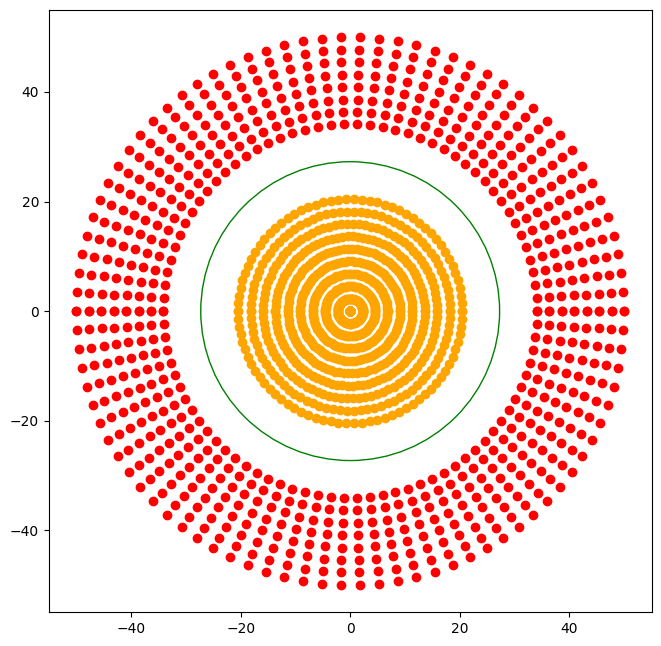

In [9]:
a = np.linspace(0,50,23)
print(a)
plt.rcParams["figure.figsize"] = [6.7, 6.7]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize = (6,6))
figure = plt.figure()
axes = figure.add_subplot()
X = np.array([])
Y = np.array([])
X2 = np.array([])
Y2 = np.array([])
for i in range(0,23):
  x = []
  y= []
  for j in range(23):
    if i <= 9 or i >= 15:
      y.append(a[i]*math.sin(4*j/180*3.1415))
      y.append(-a[i]*math.sin(4*j/180*3.1415))
      y.append(a[i]*math.sin(4*j/180*3.1415))
      y.append(-a[i]*math.sin(4*j/180*3.1415))
      x.append(a[i]*math.cos(4*j/180*3.1415))
      x.append(a[i]*math.cos(4*j/180*3.1415))
      x.append(-a[i]*math.cos(4*j/180*3.1415))
      x.append(-a[i]*math.cos(4*j/180*3.1415))
      if i <= 9:
        X = np.append(X,x)
        Y = np.append(Y,y)
      else:
        X2 = np.append(X2,x)
        Y2 = np.append(Y2,y)
  if i <= 9:
    plt.scatter(x,y, color = "orange")
  if i >= 15:
    plt.scatter(x,y, color = "r")
cir = plt.Circle( (0, 0), radius = 27.272727 , fill = False , color = 'g')
axes.set_aspect(1)
axes.add_artist(cir)
plt.show()

In [10]:
Z = np.sqrt(X**2+Y**2)
Z2 = np.sqrt(X2**2+Y2**2)
df = px.data.iris()
s1 = pd.Series(X)
s2 = pd.Series(Y)
s3 = pd.Series(Z)
s4 = pd.Series(np.full(X.shape,'Low'))
frame = {'X': s1,
         'Y': s2,
         '(X^2+Y^2)^0.5': s3,
         'Type' : s4}
df1 = pd.DataFrame(frame)
s12 = pd.Series(X2)
s22 = pd.Series(Y2)
s32 = pd.Series(Z2)
s42 = pd.Series(np.full(X.shape,'High'))
frame2 = {'X': s12,
         'Y': s22,
         '(X^2+Y^2)^0.5': s32,
         'Type' : s42}
df2 = pd.DataFrame(frame2)
df3 = pd.concat([df1,df2])
fig = px.scatter_3d(df3, x='X', y='Y', z='(X^2+Y^2)^0.5',color = 'Type',color_discrete_sequence=[
                 "orange", "red"], width=1200, height=1000)
x= np.linspace(-50, 50, 100)
y= np.linspace(-50, 50, 100)
z= 27.2727*np.ones((100,100))
mycolorscale = [[0, '#533260'],
                [1, '#533260']]

surf = go.Surface(x=x, y=y, z=z, colorscale=mycolorscale, showscale=False, opacity=0.5)
fig.add_trace(surf)
fig.show()

In [6]:
Z = np.sqrt(X*Y)
Z2 = np.sqrt(X2*Y2)
df = px.data.iris()
s1 = pd.Series(X)
s2 = pd.Series(Y)
s3 = pd.Series(Z)
s4 = pd.Series(np.full(X.shape,'Low'))
frame = {'X': s1,
         'Y': s2,
         'XY': s3,
         'Type' : s4}
df1 = pd.DataFrame(frame)
s12 = pd.Series(X2)
s22 = pd.Series(Y2)
s32 = pd.Series(Z2)
s42 = pd.Series(np.full(X.shape,'High'))
frame2 = {'X': s12,
         'Y': s22,
         'XY': s32,
         'Type' : s42}
df2 = pd.DataFrame(frame2)
df3 = pd.concat([df1,df2])
fig = px.scatter_3d(df3, x='X', y='Y', z='XY',color = 'Type',color_discrete_sequence=[
                 "orange", "red"], width=1200, height=1000)
x= np.linspace(-50, 50, 100)
y= np.linspace(-50, 50, 100)
z= 27.2727*np.ones((100,100))
mycolorscale = [[0, '#533260'],
                [1, '#533260']]

#surf = go.Surface(x=x, y=y, z=z, colorscale=mycolorscale, showscale=False, opacity=0.5)
#fig.add_trace(surf)

fig.show()

C:\Users\YURI\AppData\Local\Temp\ipykernel_9440\2692038292.py:1: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\YURI\AppData\Local\Temp\ipykernel_9440\2692038292.py:2: RuntimeWarning:

invalid value encountered in sqrt



In [11]:
Z = np.sqrt(X*Y)
Z2 = np.sqrt(X2*Y2)
df = px.data.iris()
s1 = pd.Series(X**2)
s2 = pd.Series(Y**2)
s3 = pd.Series(Z)
s4 = pd.Series(np.full(X.shape,'Low'))
frame = {'X^2': s1,
         'Y^2': s2,
         'XY': s3,
         'Type' : s4}
df1 = pd.DataFrame(frame)
s12 = pd.Series(X2**2)
s22 = pd.Series(Y2**2)
s32 = pd.Series(Z2)
s42 = pd.Series(np.full(X.shape,'High'))
frame2 = {'X^2': s12,
         'Y^2': s22,
         'XY': s32,
         'Type' : s42}
df2 = pd.DataFrame(frame2)
df3 = pd.concat([df1,df2])
fig = px.scatter_3d(df3, x='X^2', y='Y^2', z='XY',color = 'Type',color_discrete_sequence=[
                 "orange", "red"], width=1200, height=1000)
x= np.linspace(-50, 50, 100)
y= np.linspace(-50, 50, 100)
z= 27.2727*np.ones((100,100))
mycolorscale = [[0, '#533260'],
                [1, '#533260']]

#surf = go.Surface(x=x, y=y, z=z, colorscale=mycolorscale, showscale=False, opacity=0.5)
#fig.add_trace(surf)
fig.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22796\3521336772.py:1: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22796\3521336772.py:2: RuntimeWarning:

invalid value encountered in sqrt



In [8]:
df_new = pd.DataFrame({"sepal length (cm)":[5],
                       "sepal width (cm)":[3.6],
                    "petal length (cm)":[2.9],
                    "petal width (cm)":[0.9]})
flower.data = pd.concat([flower.data,df_new])


In [9]:
flower.target = flower.target.append(pd.Series([0]),ignore_index = True)
flower.target

AttributeError: 'Series' object has no attribute 'append'

0.31872155698744076
0.31872155698744076
Intercept : [-14.41486828]
Coefficient : [[2.1829247  2.25365588]]


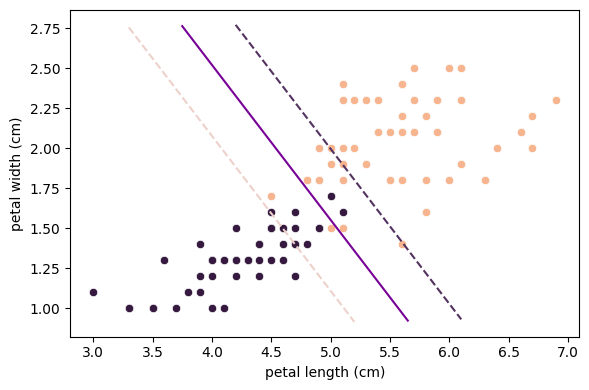

In [13]:

svm_pipeline = skp.make_pipeline(StandardScaler(),sksvm.LinearSVC(C=1,random_state = 42))

svm_model = sksvm.SVC(kernel = 'linear',C=1)
svm_model.fit(flower.data[['petal length (cm)','petal width (cm)']].values , flower.target == 2)

x = np.array([3.75,5.65])
m = - svm_model.coef_[0][0] /svm_model.coef_[0][1]
b = - svm_model.intercept_[0] / svm_model.coef_[0][1]
y =   m * x + b

dist = ((svm_model.coef_[0][0]*flower.data['petal length (cm)'] + svm_model.coef_[0][1]*flower.data['petal width (cm)'] + svm_model.intercept_[0])/(math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2 ))).abs()
shrt = float(dist.sort_values().iloc[2])
shrt2 = float(dist.sort_values().iloc[3])

shrt = 1/math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)
shrt2 = shrt

print(shrt)
print(shrt2)

b1 = b + shrt2 * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]
b2 = b - shrt * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]

x2 = np.array([4.2,6.1])
x3= np.array([3.3,5.2])
x4 = np.array([4,6])

y1 =   m * x2 + b1
y2 =   m * x3 + b2

y4 = - 1.15000022 / 0.65000009 * x + 3.44500063/0.65000009

print(f"Intercept : {svm_model.intercept_}")
print(f"Coefficient : {svm_model.coef_}")

plt.figure(figsize = (6,4))
sns.set_palette("rocket")
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 1])
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 2],color=sns.color_palette("rocket")[5])
plt.plot(x,y,color = '#770096')
plt.plot(x2,y1,color = '#533260',linestyle = 'dashed')
plt.plot(x3,y2,color = '#edd1cb',linestyle = 'dashed')
#plt.plot(x4,y4,color = 'black',linestyle = 'dotted')
plt.show()

In [14]:
for i in range(150):
  if (flower.target[i]  == 1):
    flower.data['petal length (cm)'][i] = flower.data['petal length (cm)'][i] - 1

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22796\185983741.py:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22796\185983741.py:3: SettingWithCopyWarning:


A value is trying to be set on a 

In [15]:
flower.data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [16]:
df_new = pd.DataFrame({"sepal length (cm)":[5,5.2, 4.95 ,5 , 5.2, 5, 4.95, 5.9, 6.1, 4.95, 5.9, 6.1, 5.85, 5.8, 5.7],
                       "sepal width (cm)":[3.6, 3.4, 3.7, 3.6, 3.4, 3.7, 3.6, 3.4, 3, 2.8, 3.4, 3, 2.8, 2.9, 3],
                    "petal length (cm)":[2,2.05,2,1.8,2.1,1.85,2.1,2.2,2.2,2.7,2.15,2.25,2.6,2.4,2.7],
                    "petal width (cm)":[0.9,1,0.75,0.6,0.3,0.8,1.05,0.9,0.7,0.6,1.1,1.05,1.125,0.8,0.9]})
flower.data = pd.concat([flower.data,df_new])

In [17]:
flower.target = flower.target.append(pd.Series([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]))
flower.target

AttributeError: 'Series' object has no attribute 'append'

In [19]:
svm_pipeline = skp.make_pipeline(StandardScaler(),sksvm.LinearSVC(C=1,random_state = 42))

svm_model = sksvm.SVC(kernel = 'linear',C = 1)
svm_model.fit(flower.data[['petal length (cm)','petal width (cm)']].values , flower.target == 0)

x = np.array([1,2.7])
m = - svm_model.coef_[0][0] /svm_model.coef_[0][1]
b = - svm_model.intercept_[0] / svm_model.coef_[0][1]
y =   m * x + b

dist = ((svm_model.coef_[0][0]*flower.data['petal length (cm)'] + svm_model.coef_[0][1]*flower.data['petal width (cm)'] + svm_model.intercept_[0])/(math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2 ))).abs()
shrt = float(dist.sort_values().iloc[2])
shrt2 = float(dist.sort_values().iloc[3])

shrt = 1/math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)
shrt2 = shrt

print(shrt)
print(shrt2)

b1 = b + shrt2 * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]
b2 = b - shrt * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]

x2 = np.array([1,2.2])
x3= np.array([1,3.3])
x4 = np.array([3,4])

y1 =   m * x2 + b1
y2 =   m * x3 + b2

y4 = - 1.15000022 / 0.65000009 * x + 3.44500063/0.65000009

print(f"Intercept : {svm_model.intercept_}")
print(f"Coefficient : {svm_model.coef_}")

plt.figure(figsize = (6,4))
sns.set_palette("rocket")
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 0])
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 1],color=sns.color_palette("rocket")[5])
plt.plot(x,y,color = '#770096')
plt.plot(x2,y1,color = '#533260',linestyle = 'dashed')
plt.plot(x3,y2,color = '#edd1cb',linestyle = 'dashed')
#plt.plot(x4,y4,color = 'black',linestyle = 'dotted')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [165, 150]